In [37]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
os.getcwd()

'C:\\Users\\eshub'

In [39]:
G = nx.Graph()

In [40]:
dir = 'OneDrive/Desktop/StockData'

In [41]:
file_names = []
files = [file for file in os.listdir(dir)]

In [42]:
files_dict = {ind: name for (ind, name) in enumerate(files)}
sizes = []

for file in files:
    file = file[:-4]
    file_names.append(file)

# for x in file_names:
#     print(x)

In [43]:
def find_coefficient(dict, col, corr_list):
    stocks = 30
    
    for i in range(stocks):
        path = dir + '/' + files_dict[i]
        df = pd.read_csv(dir + '/' + files_dict[i])
        dict[i] = [os.path.basename(path.split('/')[-1]).split('/')[-1], df[col]]
    
    for i in range(stocks):
        for j in range(i + 1, stocks):
            s1 = dict[i][1]
            s2 = dict[j][1]
            
            corr = s1.corr(s2, method='pearson')            
            if corr >= 0.75:
                if G.has_edge(i, j):
                    G[file_names[i]][file_names[j]]['weight'] += (1 / corr)
                else:
                    G.add_edge(file_names[i], file_names[j], weight=corr)
                corr_list.append([i, j, 1 / corr])

In [44]:
opening_dict = {}
closing_dict = {}
volumes_dict = {}
highest_dict = {}
lowest_dict = {}

opening_correlation_list = []
closing_correlation_list = []
volumes_correlation_list = []
highest_correlation_list = []
lowest_correlation_list = []

In [45]:
for x in opening_correlation_list:
    print(x)

In [46]:
for x in closing_correlation_list:
    print(x)

In [47]:
for x in volumes_correlation_list:
    print(x)

In [48]:
for x in highest_correlation_list:
    print(x)

In [49]:
for x in lowest_correlation_list:
    print(x)

In [50]:
find_coefficient(opening_dict, 'Open', opening_correlation_list)
find_coefficient(closing_dict, 'Close', closing_correlation_list)
find_coefficient(volumes_dict, 'Volume', volumes_correlation_list)
find_coefficient(highest_dict, 'High', highest_correlation_list)
find_coefficient(lowest_dict, 'Low', lowest_correlation_list)

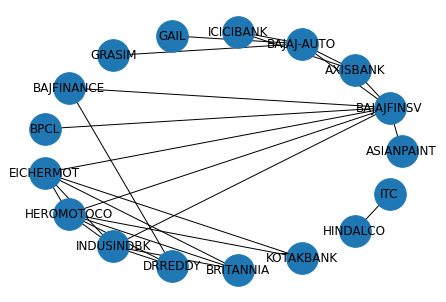

In [51]:
nx.draw_circular(G, with_labels = True, node_size = 1000)